## Import modules and corpus

In [1]:
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud_2020

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

from ast import literal_eval

In [26]:
import source.helper_functions as helper

In [21]:
file = '../tal-scrape/total_trans_normalized.csv'
tal_df = pd.read_csv(file, converters = helper.converters)

In [22]:
tal_df['group'] = tal_df.apply(lambda x: helper.group(x), axis=1)

In [42]:
grouped = helper.agg_text(tal_df,'group')

## Create word2vec model

Need to do this for every group

### Group 1

In [127]:
talW2V = gensim.models.word2vec.Word2Vec(grouped['no_lemma_normalized_sents'].iloc[0],size=1000)

In [111]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

def makeDF(model, word_list, dim_dict):
    new_dict = {}
    for k,v in dim_dict.items():
        tmp = []
        for word in word_list:
            tmp.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), v.reshape(1,-1))[0][0])
        new_dict[k] = tmp
    df = pd.DataFrame(new_dict, index = word_list)
    return df
    
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

In [132]:
# dimensions
Gender = dimension(talW2V, ['man','guy', 'male'], ['woman', 'girl', 'female'])
Race = dimension(talW2V, ['black','blacks', 'brown', 'asian', 'hispanic'], ['white', 'whites', 'white', 'white', 'white', 'white'])
Class = dimension(talW2V, ['rich', 'expensive', 'wealthy'], ['poor', 'cheap', 'poor'])

In [145]:
Morality = dimension(talW2V, ['good', 'good', 'honest', 'generous', 'pure'], 
                     ['bad', 'evil','lie', 'selfish', 'dirty'])

In [151]:
Education = dimension(talW2V, ['educated','smart'], 
                      ['dumb','stupid'])

In [152]:
dim_dict = {'gender': Gender, 'race': Race, 'class': Class, 'morality':Morality, 'education':Education}

In [262]:
# word lists
emotions = ['happy', 'sad', 'excited','fear', 'lonely', 'ashamed', 'shame', 
            'embarrassed', 'embarrass', 'hate', 'love', 'anger', 'upset', 'elated', 'tired', 'lazy', 'dread', 'hope']

In [263]:
opinions = ['believe', 'belief', 'perspective', 'opinion', 'thought', 'think', 'attitude']

In [264]:
self=['self', 'appearance', 'looks', 'confidence', 'perception', 'gay', 
      'lesbian', 'asian', 'hispanic', 'black', 'white', 'ethnic', 'american', 'queer', 'exotic']

In [265]:
rel=['single', 'divorce', 'divorced', 'family', 'brother', 'sister', 'children', 'aunt', 'uncle',
     'child', 'wedding', 'married', 'marriage', 'boyfriend', 'girlfriend', 'partner', 'love']

In [184]:
Emodf = makeDF(talW2V, emotions, dim_dict)
Opdf = makeDF(talW2V, opinions, dim_dict)
Selfdf = makeDF(talW2V, self, dim_dict)
Reldf = makeDF(talW2V, rel, dim_dict)

Emotions


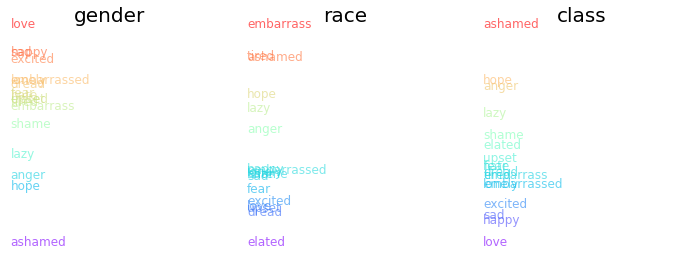

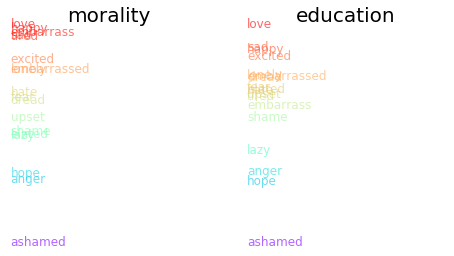

In [194]:
print('Emotions')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Emodf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Emodf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Emodf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Emodf, 'morality')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Emodf, 'education')
plt.show()

Opinions


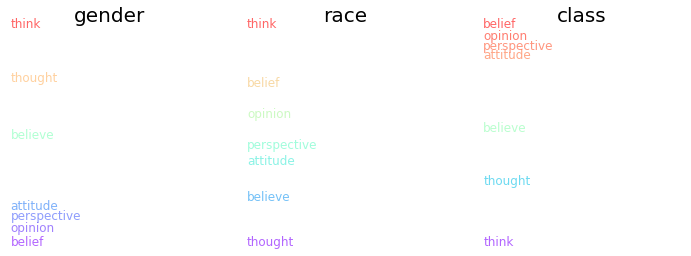

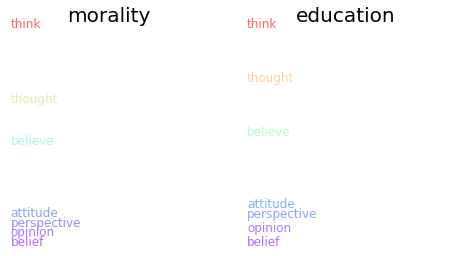

In [193]:
print('Opinions')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Opdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Opdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Opdf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Opdf, 'morality')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Opdf, 'education')
plt.show()

Identity


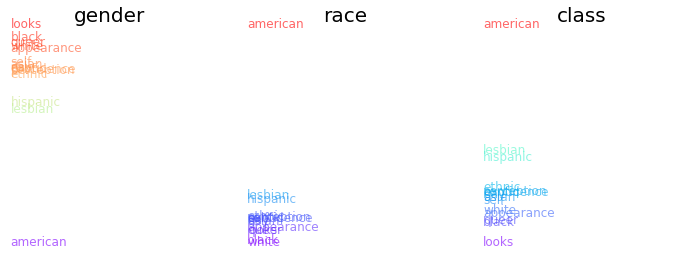

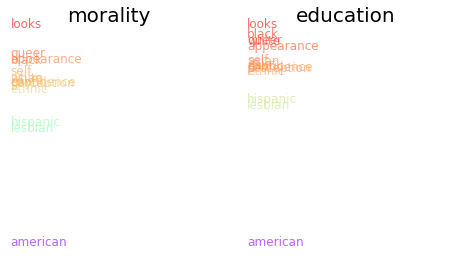

In [192]:
print('Identity')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Selfdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Selfdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Selfdf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Selfdf, 'morality')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Selfdf, 'education')
plt.show()

Relationships


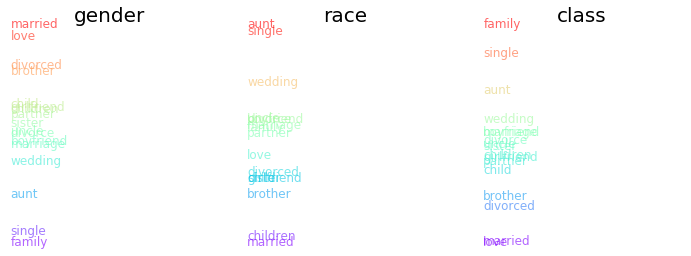

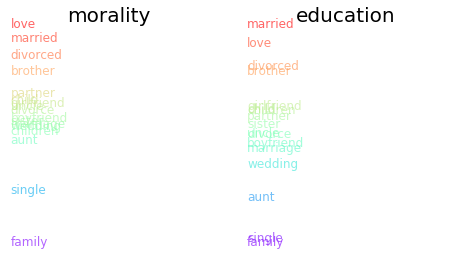

In [191]:
print('Relationships')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Reldf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Reldf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Reldf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Reldf, 'morality')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Reldf, 'education')
plt.show()

### Group 2

In [280]:
talW2V = gensim.models.word2vec.Word2Vec(grouped['no_lemma_normalized_sents'].iloc[1],size=1000)

In [293]:
self.remove('hispanic')

In [283]:
from copy import deepcopy

In [303]:
def clean_words(model,word_list):
    dupe = deepcopy(word_list)
    for w in dupe:
        try:
            x=model[w]
        except:
            dupe.remove(w)
    return dupe

In [294]:
Emodf = makeDF(talW2V, clean_words(talW2V,emotions), dim_dict)
Opdf = makeDF(talW2V, clean_words(talW2V,opinions), dim_dict)
Selfdf = makeDF(talW2V, clean_words(talW2V,self), dim_dict)
Reldf = makeDF(talW2V, clean_words(talW2V,rel), dim_dict)

['happy', 'sad', 'excited', 'fear', 'lonely', 'ashamed', 'shame', 'embarrassed', 'embarrass', 'hate', 'love', 'anger', 'upset', 'elated', 'tired', 'lazy', 'dread', 'hope']
['believe', 'belief', 'perspective', 'opinion', 'thought', 'think', 'attitude']
['self', 'appearance', 'looks', 'confidence', 'perception', 'gay', 'lesbian', 'asian', 'black', 'white', 'ethnic', 'american', 'queer', 'exotic']
['single', 'divorce', 'divorced', 'family', 'brother', 'sister', 'children', 'aunt', 'uncle', 'child', 'wedding', 'married', 'marriage', 'boyfriend', 'girlfriend', 'partner', 'love']


Emotions


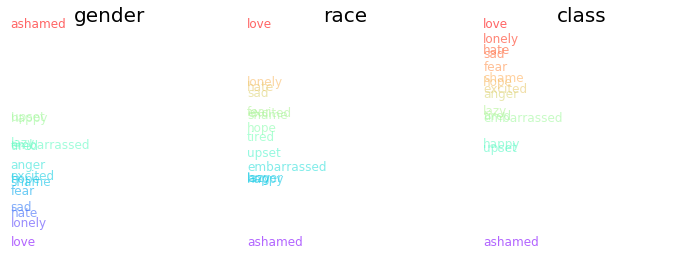

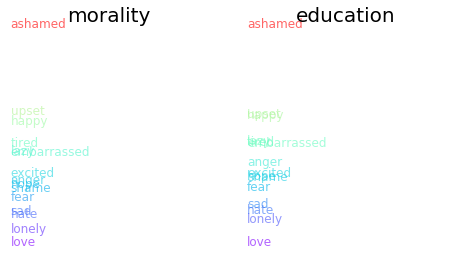

Opinions


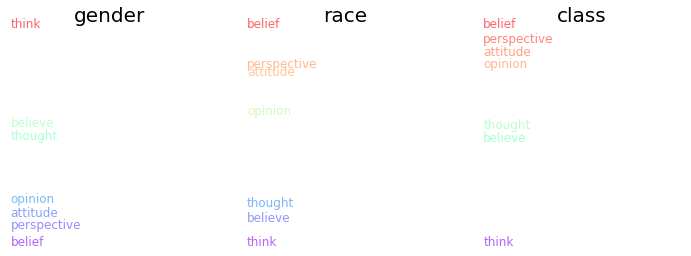

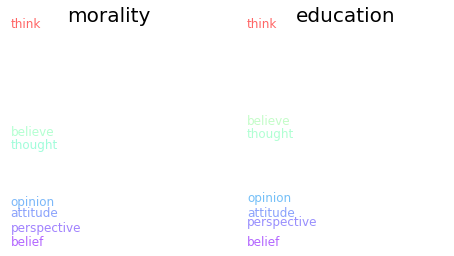

Identity


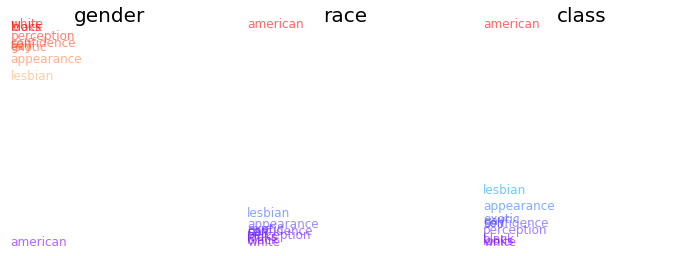

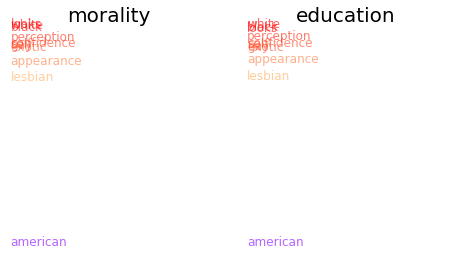

Relationships


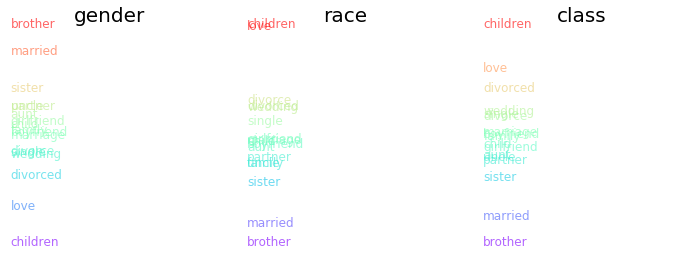

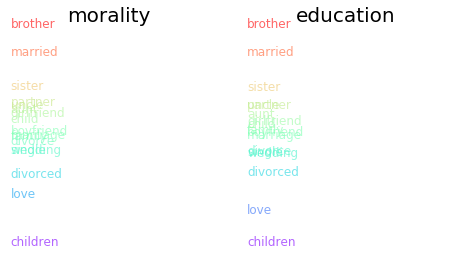

In [295]:
# plot

print('Emotions')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Emodf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Emodf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Emodf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Emodf, 'morality')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Emodf, 'education')
plt.show()

print('Opinions')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Opdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Opdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Opdf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Opdf, 'morality')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Opdf, 'education')
plt.show()

print('Identity')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Selfdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Selfdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Selfdf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Selfdf, 'morality')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Selfdf, 'education')
plt.show()

print('Relationships')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Reldf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Reldf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Reldf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Reldf, 'morality')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Reldf, 'education')
plt.show()

### Group 3

In [296]:
talW2V = gensim.models.word2vec.Word2Vec(grouped['no_lemma_normalized_sents'].iloc[2],size=1000)

In [312]:
Emodf = makeDF(talW2V, clean_words(talW2V,emotions), dim_dict)
Opdf = makeDF(talW2V, clean_words(talW2V,opinions), dim_dict)
Selfdf = makeDF(talW2V, clean_words(talW2V,self), dim_dict)
Reldf = makeDF(talW2V, clean_words(talW2V,rel), dim_dict)

Emotions


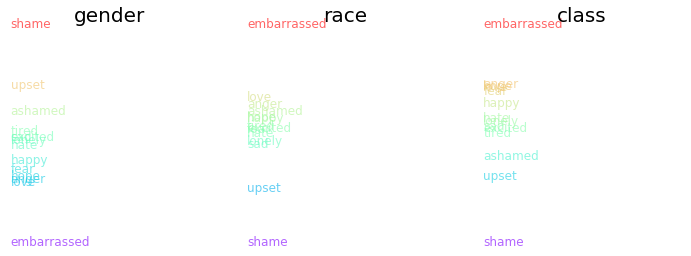

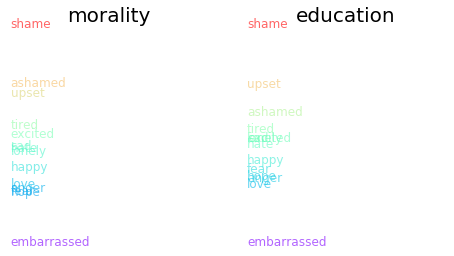

Opinions


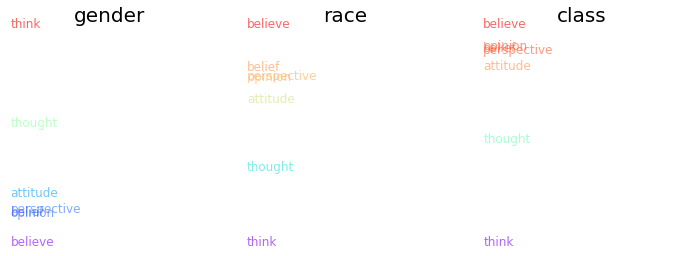

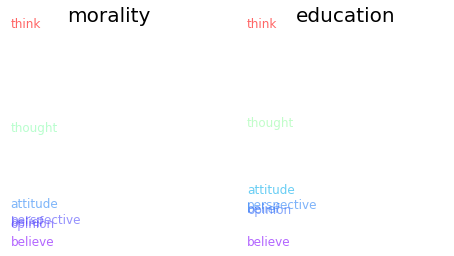

Identity


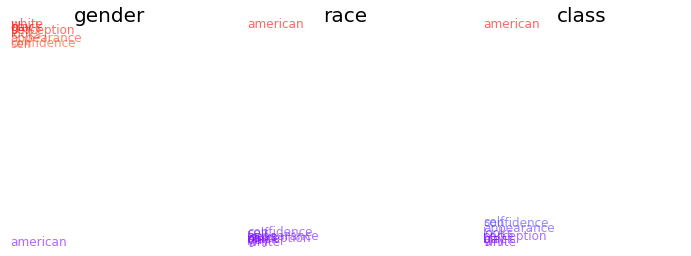

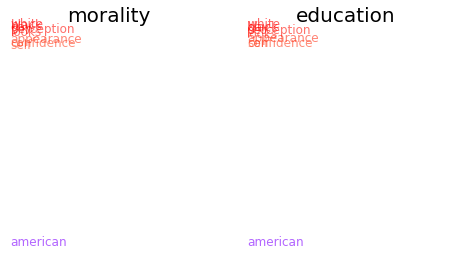

Relationships


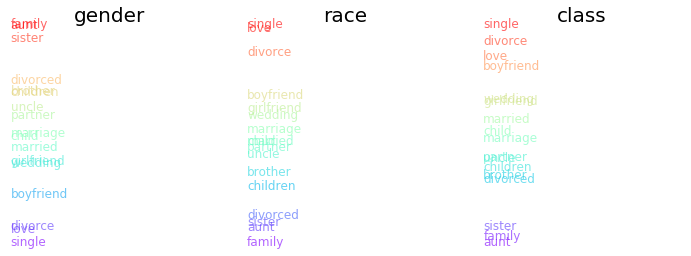

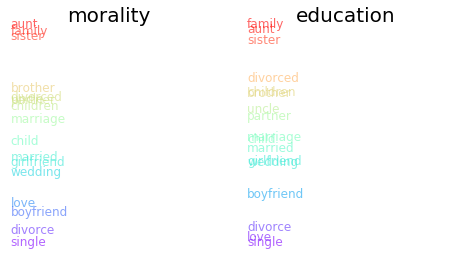

In [313]:
Emodf = makeDF(talW2V, clean_words(talW2V,emotions), dim_dict)
Opdf = makeDF(talW2V, clean_words(talW2V,opinions), dim_dict)
Selfdf = makeDF(talW2V, clean_words(talW2V,self), dim_dict)
Reldf = makeDF(talW2V, clean_words(talW2V,rel), dim_dict)

# plot

print('Emotions')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Emodf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Emodf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Emodf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Emodf, 'morality')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Emodf, 'education')
plt.show()

print('Opinions')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Opdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Opdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Opdf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Opdf, 'morality')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Opdf, 'education')
plt.show()

print('Identity')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Selfdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Selfdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Selfdf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Selfdf, 'morality')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Selfdf, 'education')
plt.show()

print('Relationships')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Reldf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Reldf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Reldf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Reldf, 'morality')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Reldf, 'education')
plt.show()

In [324]:
dupe = deepcopy(emotions)
for w in dupe:
    print()
    print(w)
    try:
        talW2V[w]
        print('fine')
    except:
        print('error')
        dupe.remove(w)
dupe


happy
fine

sad
fine

excited
fine

fear
fine

lonely
fine

ashamed
fine

shame
fine

embarrassed
fine

embarrass
error

love
fine

anger
fine

upset
fine

elated
error

lazy
error

dread
error


['happy',
 'sad',
 'excited',
 'fear',
 'lonely',
 'ashamed',
 'shame',
 'embarrassed',
 'hate',
 'love',
 'anger',
 'upset',
 'tired',
 'hope']

In [323]:
model['dread']

NameError: name 'model' is not defined